# Posterior entropy

In [1]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns

import darc
from darc.delayed import models
from darc.designs import BADDesignGenerator
from darc.delayed.designs import Griskevicius2011, Frye, Koffarnus_Bickel, Kirby2009

from darc.data_plotting import plot_delay_without_front_end_delays
from darc_parameter_recovery import simulated_experiment_trial_loop

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## Run the simulations

In [3]:
true_params = pd.DataFrame.from_dict({'logk': [-4], 'α': [2]})
N_SIMULATIONS = 3  # should be 500 for the final plot to go in the paper

In [4]:
# create empty lists which will recieve our data. Will eventually become a Long data frame
logk = []
method = []
entropy = []
trial = []

for n in range(N_SIMULATIONS):
    
    print(f'starting simulation {n} of {N_SIMULATIONS} ======================')
    
    # TODO: choose correct prior over logk
    true_params = pd.DataFrame.from_dict({'logk': [norm(-4.5, 1).rvs()], 'α': [2]})
    
    # Kirby ----------------------------------------------------------------------
    print('\tStarting Kirby')
    design_thing = Kirby2009()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    _, summary_stats = simulated_experiment_trial_loop(design_thing, model)

    # append to lists
    logk += list(summary_stats['logk_median'].values)
    entropy += list(summary_stats['logk_entropy'].values)
    method += list(['Kirby (2009)'] * summary_stats.shape[0])
    trial += list(summary_stats.index.get_values())
    
    # TODO: CLEAR MODEL AND DESIGN THING HERE ***********
    
    # Griskevicius2011 ----------------------------------------------------------
    print('\tStarting Griskevicius2011')
    design_thing = Griskevicius2011()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    _, summary_stats = simulated_experiment_trial_loop(design_thing, model)

    # append to lists
    logk += list(summary_stats['logk_median'].values)
    entropy += list(summary_stats['logk_entropy'].values)
    method += list(['Griskevicius et al (2011)'] * summary_stats.shape[0])
    trial += list(summary_stats.index.get_values())
    
    # TODO: CLEAR MODEL AND DESIGN THING HERE ***********
    
    # Koffarnus_Bickel ----------------------------------------------------------
    print('\tStarting Koffarnus_Bickel')
    design_thing = Koffarnus_Bickel()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    _, summary_stats = simulated_experiment_trial_loop(design_thing, model)

    # append to lists
    logk += list(summary_stats['logk_median'].values)
    entropy += list(summary_stats['logk_entropy'].values)
    method += list(['Koffarnus & Bickel (2014)'] * summary_stats.shape[0])
    trial += list(summary_stats.index.get_values())
    
    # TODO: CLEAR MODEL AND DESIGN THING HERE ***********
    
    # Frye ----------------------------------------------------------
    print('\tStarting Frye')
    design_thing = Frye()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    _, summary_stats = simulated_experiment_trial_loop(design_thing, model)

    # append to lists
    logk += list(summary_stats['logk_median'].values)
    entropy += list(summary_stats['logk_entropy'].values)
    method += list(['Frye et al (2016)'] * summary_stats.shape[0])
    trial += list(summary_stats.index.get_values())
    
    # TODO: CLEAR MODEL AND DESIGN THING HERE ***********
    
    # our approach --------------------------------------------------------------
    print('\tStarting BAD')
    design_thing = BADDesignGenerator(max_trials=30, 
                              RA=list(np.arange(5, 99+1, 1)), 
                              DB=list(np.arange(1, 365, 7)))
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    _, summary_stats = simulated_experiment_trial_loop(design_thing, model)

    # append to lists
    logk += list(summary_stats['logk_median'].values)
    entropy += list(summary_stats['logk_entropy'].values)
    method += list(['our approach'] * summary_stats.shape[0])
    trial += list(summary_stats.index.get_values())
    
    # TODO: CLEAR MODEL AND DESIGN THING HERE ***********
    
    
    
    

results = pd.DataFrame.from_dict({'logk': logk, 'trial': trial, 'entropy': entropy, 'method': method})

starting simulation 0 of 3 ======================
	Starting Kirby
A new TrialData object has been made
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
trial: 10
trial: 11
trial: 12
trial: 13
trial: 14
trial: 15
trial: 16
trial: 17
trial: 18
trial: 19
trial: 20
trial: 21
trial: 22
trial: 23
trial: 24
trial: 25
trial: 26
	Starting Griskevicius2011
A new TrialData object has been made
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
	Starting Koffarnus_Bickel
A new TrialData object has been made
trial: 0
_index_increments = 8
trial: 1
incrementing delay_index by 4
_index_increments = 4
trial: 2
incrementing delay_index by 2
_index_increments = 2
trial: 3
incrementing delay_index by 1
_index_increments = 1
trial: 4
incrementing delay_index by 1
_index_increments = 1
trial: 5
	Starting Frye
A new TrialData object has been made
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
trial: 10
t

/Users/btvincent/git-local/darc-experiments-python/bad/optimisation.py:153: RuntimeWarning: invalid value encountered in true_divide
  (n_times_sampled+n_times_sampled_iter))
/Users/btvincent/git-local/darc-experiments-python/bad/optimisation.py:226: RuntimeWarning: invalid value encountered in true_divide
  (n_times_sampled + n_times_sampled_iter))


trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
trial: 10
trial: 11
trial: 12
trial: 13
trial: 14
trial: 15
trial: 16
trial: 17
trial: 18
trial: 19
trial: 20
trial: 21
trial: 22
trial: 23
trial: 24
trial: 25
trial: 26
trial: 27
trial: 28
trial: 29
trial: 30
starting simulation 1 of 3 ======================
	Starting Kirby
A new TrialData object has been made
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
trial: 10
trial: 11
trial: 12
trial: 13
trial: 14
trial: 15
trial: 16
trial: 17
trial: 18
trial: 19
trial: 20
trial: 21
trial: 22
trial: 23
trial: 24
trial: 25
trial: 26
	Starting Griskevicius2011
A new TrialData object has been made
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
	Starting Koffarnus_Bickel
A new TrialData object has been made
trial: 0
_index_increments = 8
trial: 1
incrementing delay_index by 4
_index_increments = 4
trial: 2
decrementing delay_index by 2
_index_increments = 2
tr

/Users/btvincent/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'posterior entropy (bits)')

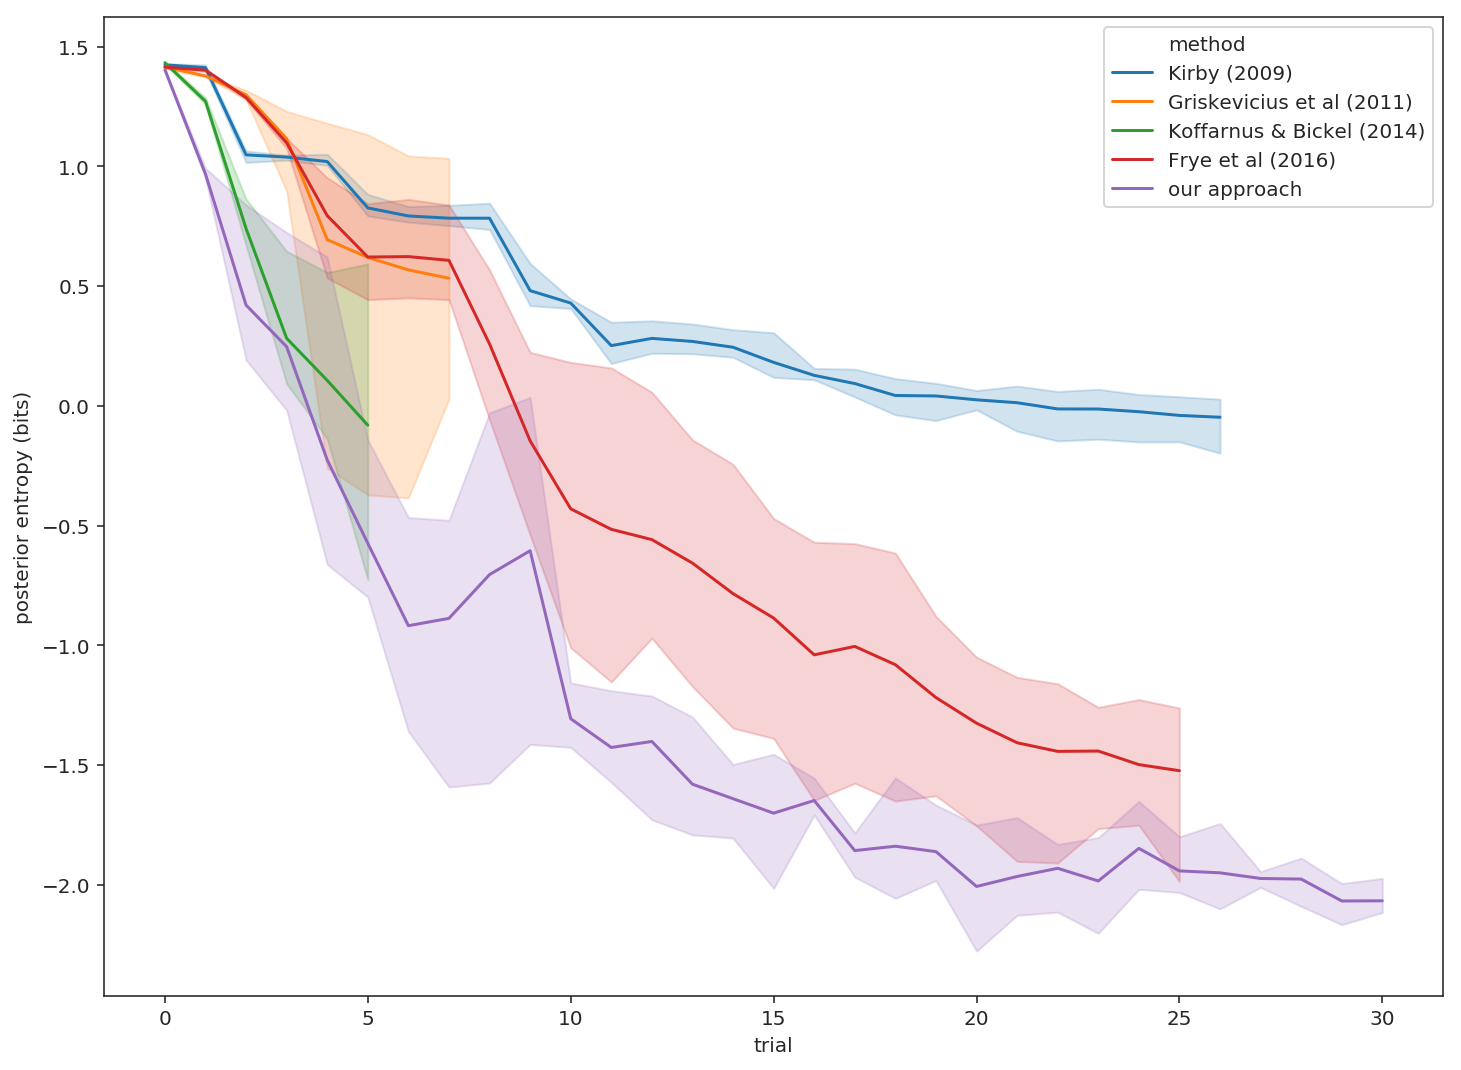

In [5]:
#sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(12, 9))

sns.lineplot(x='trial', y='entropy', hue='method', data=results, ax=ax)
ax.set_ylabel('posterior entropy (bits)')

What do the errorbars represent?
The documentation here https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial states that the default is the 95% confidence interval around the mean.

This is slightly ambigous. I have created an issue here https://github.com/mwaskom/seaborn/issues/1619

In [6]:
fig.savefig('posterior_entropy_reduction.pdf', bbox_inches='tight')